In [1]:
import re
import json
import time
from datetime import timedelta,date,datetime
import requests
import pandas as pd
import smtplib
from email.mime.text import MIMEText
from email.utils import formataddr
import traceback 
    

#cubelist_100=getcubelistfromrank()20171205
cubelist_100=[('SP1031367','自信的傻瓜'),('SP1006157','jbyiyi的实盘'),('SP1007411','失去的十年的实盘'),('SP1040730','ffee的实盘'),('SP1011284','玉树临风驴'),('SP1032842','FreeMan'),('SP1031111','韭菜园'),('SP1002713','明日花雨的实盘'),('SP1030533','C10ver的实盘'),('SP1008804','小庄15760_的实盘'),('SP1007406','骑熊放牛的实盘'),('SP1031303','coolpp1988的实盘'),('SP1000223','BBEight的实盘'),('SP1036120','日知进道'),('SP1035646','新月资本'),('SP1037693','就爱抄作业的实盘'),('SP1014166','左右穿云箭的实盘'),('SP1032106','飞侠2012的实盘'),('SP1038275','豆包包_的实盘'),('SP1011311','参赛实盘-YS830'),('SP1032823','WGB的SuperAlpha'),('SP1003728','祥门村长的实盘'),('SP1032703','朱子明的实盘'),('SP1003425','肖振的实盘'),('SP1010255','一剑东来的实盘'),('SP1037748','繁事里的_的实盘'),('SP1032901','牛小眼的实盘'),('SP1010942','斌斌小圆球的实盘'),('SP1031434','爱_生活的实盘'),('SP1000168','弱弱的自由160627'),('SP1003980','求-败的实盘'),('SP1034376','xingmeng的实盘'),('SP1035847','故纸堆中的实盘'),('SP1014724','Chen_Winn_的实盘'),('SP1035373','liyi888的实盘'),('SP1035974','肥兔哥的实盘'),('SP1014613','和泽打板'),('SP1037657','欧奈尔-彼_的实盘'),('SP1001725','擅长拿耗_的实盘'),('SP1039455','cndaan的实盘'),('SP1001176','chaijinyy的实盘'),('SP1012821','凯撒统帝的实盘'),('SP1004138','寧靜之雨的实盘'),('SP1030095','null的实盘'),('SP1008986','米修斯之火'),('SP1004699','一步一步往上爬'),('SP1037951','谢小哥的实盘'),('SP1001385','打倒沙家帮'),('SP1039692','Super潇毅的实盘'),('SP1002657','背景npc的实盘'),('SP1037562','久作长安旅的实盘'),('SP1030138','瑶瑶katri_的实盘'),('SP1030506','科技工业强红'),('SP1006635','龙头轮动'),('SP1001601','小千千的实盘'),('SP1040391','fredpan2的实盘'),('SP1034305','茫然四顾1的实盘'),('SP1013281','跟着感觉走'),('SP1010403','我好弱的实盘'),('SP1014319','小周最爱_的实盘'),('SP1001746','isnullptr的实盘'),('SP1034534','庄稼汉999的实盘'),('SP1036249','老夫喜欢_的实盘'),('SP1009905','kimisu的实盘'),('SP1030761','沪深价值精选'),('SP1033112','淳熙客的实盘'),('SP1012335','继续走'),('SP1039428','宁静致远__的实盘'),('SP1030238','ichjj的实盘'),('SP1011793','盛放得赤_的实盘'),('SP1000952','Woo食大盘_的实盘'),('SP1002647','卯金刀每文的实盘'),('SP1012181','ardai_ren的实盘'),('SP1001344','一剑飘飘_的实盘'),('SP1030627','名_天堂来_的实盘'),('SP1003149','蜗牛慢慢爬的实盘'),('SP1035592','戒烟不戒_的实盘'),('SP1010836','月下寒梅的实盘'),('SP1034441','乌苏里提的实盘'),('SP1013524','地月星空的实盘'),('SP1006974','我是周老幺的实盘'),('SP1033389','Darkness__的实盘'),('SP1032340','初学者2017的实盘'),('SP1000998','孩子账户实盘'),('SP1011732','BOOM_Shakalaka'),('SP1033136','runner_ch_的实盘'),('SP1010978','欢无之尘的实盘'),('SP1007128','xtcliff的实盘'),('SP1034624','coldlair的实盘'),('SP1014561','阿Q实盘'),('SP1012800','璞心追求盈利之路'),('SP1039927','陆庄的实盘'),('SP1034752','芝麻小小将的实盘'),('SP1008703','慢跑不止的实盘'),('SP1030633','行孙者悟空的实盘'),('SP1009493','wenct的实盘'),('SP1000369','太云投资的实盘'),('SP1031750','夜雨1578的实盘'),('SP1004331','麦可Ge的实盘'),('SP1006573','投资土八路的实盘')]
cubelist_48=[('SP1000168','50.3'),('SP1000369','6.8'),('SP1000952','20.4'),('SP1000998','5.9'),('SP1001176','1.1'),('SP1001601','50.1'),('SP1001725','7.0'),('SP1001746','0.4'),('SP1002827','1.6'),('SP1003149','4.2'),('SP1004138','0.2'),('SP1006573','11.8'),('SP1006974','3.6'),('SP1007128','1.7'),('SP1007406','19.2'),('SP1007521','22.1'),('SP1008703','2.2'),('SP1008804','0.6'),('SP1008986','39.0'),('SP1009577','22.0'),('SP1010403','0.9'),('SP1010977','4.1'),('SP1010978','2.4'),('SP1011284','0.7'),('SP1011311','50.2'),('SP1011541','2.2'),('SP1011732','6.4'),('SP1011793','14.6'),('SP1012181','3.7'),('SP1013524','2.0'),('SP1014319','0.8'),('SP1014561','8.3'),('SP1014724','0.4'),('SP1030238','50.2'),('SP1030506','2.6'),('SP1031367','35.3'),('SP1031750','4.5'),('SP1032901','1.9'),('SP1033112','0.7'),('SP1033389','5.3'),('SP1034376','0.2'),('SP1034534','9.3'),('SP1034624','13.3'),('SP1035971','0.8'),('SP1035974','0.6'),('SP1037951','0.9'),('SP1039428','3.8'),('SP1039693','3.7'),]
cubelist_13=[('SP1001746','0.4'),('SP1004138','0.2'),('SP1008804','0.6'),('SP1010403','0.9'),('SP1011284','0.7'),('SP1013524','2.0'),('SP1014319','0.8'),('SP1014724','0.4'),('SP1034376','0.2'),('SP1035971','0.8'),('SP1035974','0.6'),('SP1037951','0.9'),]
stocklessthan10=['SZ000005', 'SZ000006', 'SZ000008', 'SZ000009', 'SZ000010', 'SZ000012', 'SZ000016', 'SZ000017', 'SZ000018', 'SZ000021', 'SZ000027', 'SZ000030', 'SZ000031', 'SZ000035', 'SZ000036', 'SZ000037', 'SZ000046', 'SZ000055', 'SZ000058', 'SZ000059', 'SZ000061', 'SZ000066', 'SZ000068', 'SZ000069', 'SZ000070', 'SZ000078', 'SZ000088', 'SZ000089', 'SZ000099', 'SZ000100', 'SZ000153', 'SZ000157', 'SZ000158', 'SZ000159', 'SZ000166', 'SZ000301', 'SZ000338', 'SZ000404', 'SZ000407', 'SZ000409', 'SZ000410', 'SZ000413', 'SZ000415', 'SZ000416', 'SZ000417', 'SZ000419', 'SZ000420', 'SZ000421', 'SZ000422', 'SZ000425', 'SZ000426', 'SZ000428', 'SZ000429', 'SZ000430', 'SZ000498', 'SZ000505', 'SZ000506', 'SZ000509', 'SZ000510', 'SZ000511', 'SZ000514', 'SZ000516', 'SZ000517', 'SZ000518', 'SZ000520', 'SZ000521', 'SZ000523', 'SZ000528', 'SZ000529', 'SZ000530', 'SZ000531', 'SZ000536', 'SZ000539', 'SZ000540', 'SZ000541', 'SZ000543', 'SZ000545', 'SZ000548', 'SZ000551', 'SZ000552', 'SZ000554', 'SZ000557', 'SZ000558', 'SZ000559', 'SZ000560', 'SZ000561', 'SZ000563', 'SZ000564', 'SZ000565', 'SZ000570', 'SZ000571', 'SZ000572', 'SZ000573', 'SZ000582', 'SZ000585', 'SZ000587', 'SZ000589', 'SZ000591', 'SZ000592', 'SZ000593', 'SZ000595', 'SZ000598', 'SZ000599', 'SZ000600', 'SZ000601', 'SZ000606', 'SZ000607', 'SZ000608', 'SZ000611', 'SZ000612', 'SZ000613', 'SZ000616', 'SZ000619', 'SZ000620', 'SZ000622', 'SZ000627', 'SZ000628', 'SZ000629', 'SZ000630', 'SZ000631', 'SZ000632', 'SZ000633', 'SZ000637', 'SZ000650', 'SZ000652', 'SZ000655', 'SZ000656', 'SZ000659', 'SZ000667', 'SZ000670', 'SZ000671', 'SZ000677', 'SZ000678', 'SZ000679', 'SZ000680', 'SZ000682', 'SZ000683', 'SZ000686', 'SZ000690', 'SZ000691', 'SZ000692', 'SZ000698', 'SZ000700', 'SZ000702', 'SZ000705', 'SZ000707', 'SZ000709', 'SZ000713', 'SZ000715', 'SZ000716', 'SZ000717', 'SZ000718', 'SZ000719', 'SZ000720', 'SZ000721', 'SZ000722', 'SZ000723', 'SZ000725', 'SZ000727', 'SZ000729', 'SZ000731', 'SZ000735', 'SZ000737', 'SZ000739', 'SZ000750', 'SZ000751', 'SZ000753', 'SZ000755', 'SZ000757', 'SZ000758', 'SZ000760', 'SZ000761', 'SZ000767', 'SZ000778', 'SZ000780', 'SZ000782', 'SZ000783', 'SZ000788', 'SZ000790', 'SZ000791', 'SZ000795', 'SZ000798', 'SZ000801', 'SZ000807', 'SZ000809', 'SZ000810', 'SZ000811', 'SZ000812', 'SZ000813', 'SZ000816', 'SZ000822', 'SZ000825', 'SZ000829', 'SZ000833', 'SZ000835', 'SZ000836', 'SZ000837', 'SZ000838', 'SZ000839', 'SZ000848', 'SZ000850', 'SZ000851', 'SZ000859', 'SZ000861', 'SZ000862', 'SZ000863', 'SZ000868', 'SZ000875', 'SZ000876', 'SZ000880', 'SZ000882', 'SZ000883', 'SZ000886', 'SZ000890', 'SZ000892', 'SZ000893', 'SZ000897', 'SZ000898', 'SZ000899', 'SZ000900', 'SZ000902', 'SZ000903', 'SZ000906', 'SZ000908', 'SZ000911', 'SZ000912', 'SZ000916', 'SZ000917', 'SZ000918', 'SZ000919', 'SZ000922', 'SZ000927', 'SZ000928', 'SZ000931', 'SZ000932', 'SZ000933', 'SZ000936', 'SZ000937', 'SZ000939', 'SZ000949', 'SZ000953', 'SZ000955', 'SZ000958', 'SZ000959', 'SZ000961', 'SZ000962', 'SZ000965', 'SZ000966', 'SZ000967', 'SZ000972', 'SZ000973', 'SZ000976', 'SZ000978', 'SZ000979', 'SZ000981', 'SZ000982', 'SZ000983', 'SZ000993', 'SZ001696', 'SZ001896', 'SZ002002', 'SZ002004', 'SZ002005', 'SZ002006', 'SZ002011', 'SZ002015', 'SZ002017', 'SZ002018', 'SZ002021', 'SZ002026', 'SZ002029', 'SZ002031', 'SZ002033', 'SZ002046', 'SZ002047', 'SZ002052', 'SZ002059', 'SZ002060', 'SZ002062', 'SZ002064', 'SZ002065', 'SZ002067', 'SZ002069', 'SZ002070', 'SZ002073', 'SZ002076', 'SZ002078', 'SZ002079', 'SZ002083', 'SZ002084', 'SZ002087', 'SZ002089', 'SZ002091', 'SZ002093', 'SZ002096', 'SZ002097', 'SZ002099', 'SZ002100', 'SZ002102', 'SZ002103', 'SZ002104', 'SZ002105', 'SZ002109', 'SZ002115', 'SZ002118', 'SZ002121', 'SZ002122', 'SZ002124', 'SZ002126', 'SZ002130', 'SZ002131', 'SZ002132', 'SZ002133', 'SZ002134', 'SZ002135', 'SZ002137', 'SZ002141', 'SZ002145', 'SZ002146', 'SZ002148', 'SZ002149', 'SZ002150', 'SZ002152', 'SZ002154', 'SZ002155', 'SZ002157', 'SZ002160', 'SZ002161', 'SZ002162', 'SZ002163', 'SZ002164', 'SZ002165', 'SZ002169', 'SZ002170', 'SZ002171', 'SZ002172', 'SZ002175', 'SZ002177', 'SZ002181', 'SZ002182', 'SZ002183', 'SZ002185', 'SZ002191', 'SZ002195', 'SZ002196', 'SZ002203', 'SZ002204', 'SZ002206', 'SZ002207', 'SZ002208', 'SZ002211', 'SZ002214', 'SZ002215', 'SZ002216', 'SZ002218', 'SZ002220', 'SZ002224', 'SZ002225', 'SZ002226', 'SZ002228', 'SZ002229', 'SZ002239', 'SZ002243', 'SZ002244', 'SZ002248', 'SZ002249', 'SZ002255', 'SZ002256', 'SZ002259', 'SZ002261', 'SZ002263', 'SZ002266', 'SZ002267', 'SZ002269', 'SZ002272', 'SZ002274', 'SZ002276', 'SZ002277', 'SZ002280', 'SZ002283', 'SZ002284', 'SZ002286', 'SZ002288', 'SZ002291', 'SZ002296', 'SZ002298', 'SZ002300', 'SZ002303', 'SZ002305', 'SZ002306', 'SZ002312', 'SZ002314', 'SZ002318', 'SZ002325', 'SZ002327', 'SZ002328', 'SZ002329', 'SZ002330', 'SZ002332', 'SZ002334', 'SZ002337', 'SZ002339', 'SZ002340', 'SZ002342', 'SZ002344', 'SZ002347', 'SZ002348', 'SZ002349', 'SZ002350', 'SZ002351', 'SZ002360', 'SZ002361', 'SZ002363', 'SZ002367', 'SZ002369', 'SZ002374', 'SZ002375', 'SZ002378', 'SZ002379', 'SZ002381', 'SZ002385', 'SZ002386', 'SZ002388', 'SZ002390', 'SZ002392', 'SZ002397', 'SZ002400', 'SZ002404', 'SZ002406', 'SZ002416', 'SZ002418', 'SZ002420', 'SZ002421', 'SZ002425', 'SZ002426', 'SZ002429', 'SZ002431', 'SZ002432', 'SZ002433', 'SZ002436', 'SZ002437', 'SZ002438', 'SZ002443', 'SZ002447', 'SZ002448', 'SZ002452', 'SZ002453', 'SZ002455', 'SZ002463', 'SZ002465', 'SZ002467', 'SZ002469', 'SZ002470', 'SZ002471', 'SZ002474', 'SZ002476', 'SZ002477', 'SZ002478', 'SZ002480', 'SZ002481', 'SZ002482', 'SZ002483', 'SZ002484', 'SZ002486', 'SZ002487', 'SZ002489', 'SZ002490', 'SZ002492', 'SZ002494', 'SZ002495', 'SZ002496', 'SZ002498', 'SZ002500', 'SZ002501', 'SZ002502', 'SZ002503', 'SZ002504', 'SZ002505', 'SZ002506', 'SZ002509', 'SZ002510', 'SZ002514', 'SZ002515', 'SZ002516', 'SZ002519', 'SZ002521', 'SZ002522', 'SZ002523', 'SZ002524', 'SZ002526', 'SZ002528', 'SZ002531', 'SZ002532', 'SZ002533', 'SZ002535', 'SZ002538', 'SZ002539', 'SZ002540', 'SZ002542', 'SZ002545', 'SZ002546', 'SZ002547', 'SZ002549', 'SZ002550', 'SZ002551', 'SZ002553', 'SZ002554', 'SZ002556', 'SZ002559', 'SZ002560', 'SZ002563', 'SZ002564', 'SZ002565', 'SZ002566', 'SZ002567', 'SZ002570', 'SZ002571', 'SZ002574', 'SZ002575', 'SZ002578', 'SZ002580', 'SZ002585', 'SZ002586', 'SZ002587', 'SZ002588', 'SZ002593', 'SZ002600', 'SZ002604', 'SZ002607', 'SZ002610', 'SZ002613', 'SZ002615', 'SZ002616', 'SZ002619', 'SZ002620', 'SZ002628', 'SZ002629', 'SZ002632', 'SZ002634', 'SZ002638', 'SZ002639', 'SZ002641', 'SZ002644', 'SZ002650', 'SZ002651', 'SZ002652', 'SZ002654', 'SZ002655', 'SZ002660', 'SZ002662', 'SZ002663', 'SZ002665', 'SZ002666', 'SZ002671', 'SZ002683', 'SZ002687', 'SZ002688', 'SZ002689', 'SZ002692', 'SZ002693', 'SZ002697', 'SZ002701', 'SZ002702', 'SZ002703', 'SZ002708', 'SZ002724', 'SZ002740', 'SZ002765', 'SZ002770', 'SZ002774', 'SZ002786', 'SZ002797', 'SZ002807', 'SZ002822', 'SZ300002', 'SZ300005', 'SZ300006', 'SZ300008', 'SZ300012', 'SZ300017', 'SZ300018', 'SZ300019', 'SZ300021', 'SZ300022', 'SZ300025', 'SZ300026', 'SZ300027', 'SZ300028', 'SZ300029', 'SZ300030', 'SZ300035', 'SZ300039', 'SZ300040', 'SZ300043', 'SZ300048', 'SZ300050', 'SZ300056', 'SZ300058', 'SZ300062', 'SZ300063', 'SZ300066', 'SZ300067', 'SZ300071', 'SZ300074', 'SZ300076', 'SZ300079', 'SZ300080', 'SZ300082', 'SZ300083', 'SZ300084', 'SZ300088', 'SZ300089', 'SZ300090', 'SZ300092', 'SZ300094', 'SZ300095', 'SZ300099', 'SZ300102', 'SZ300105', 'SZ300106', 'SZ300107', 'SZ300108', 'SZ300111', 'SZ300116', 'SZ300117', 'SZ300126', 'SZ300129', 'SZ300131', 'SZ300132', 'SZ300135', 'SZ300139', 'SZ300147', 'SZ300148', 'SZ300150', 'SZ300151', 'SZ300152', 'SZ300154', 'SZ300155', 'SZ300157', 'SZ300160', 'SZ300162', 'SZ300163', 'SZ300164', 'SZ300165', 'SZ300167', 'SZ300169', 'SZ300171', 'SZ300172', 'SZ300173', 'SZ300175', 'SZ300179', 'SZ300181', 'SZ300182', 'SZ300185', 'SZ300189', 'SZ300193', 'SZ300194', 'SZ300198', 'SZ300201', 'SZ300205', 'SZ300206', 'SZ300210', 'SZ300211', 'SZ300213', 'SZ300214', 'SZ300215', 'SZ300217', 'SZ300218', 'SZ300224', 'SZ300234', 'SZ300239', 'SZ300242', 'SZ300247', 'SZ300249', 'SZ300253', 'SZ300255', 'SZ300256', 'SZ300259', 'SZ300261', 'SZ300262', 'SZ300263', 'SZ300264', 'SZ300265', 'SZ300267', 'SZ300272', 'SZ300273', 'SZ300277', 'SZ300283', 'SZ300287', 'SZ300289', 'SZ300290', 'SZ300292', 'SZ300297', 'SZ300299', 'SZ300301', 'SZ300303', 'SZ300304', 'SZ300305', 'SZ300307', 'SZ300315', 'SZ300318', 'SZ300319', 'SZ300325', 'SZ300326', 'SZ300329', 'SZ300332', 'SZ300333', 'SZ300337', 'SZ300341', 'SZ300345', 'SZ300350', 'SZ300352', 'SZ300356', 'SZ300364', 'SZ300368', 'SZ300369', 'SZ300370', 'SZ300376', 'SZ300390', 'SZ300420', 'SZ300465', 'SZ300591', 'SH600006', 'SH600008', 'SH600010', 'SH600011', 'SH600015', 'SH600016', 'SH600017', 'SH600018', 'SH600019', 'SH600020', 'SH600021', 'SH600022', 'SH600023', 'SH600025', 'SH600026', 'SH600027', 'SH600028', 'SH600031', 'SH600033', 'SH600035', 'SH600039', 'SH600050', 'SH600051', 'SH600052', 'SH600057', 'SH600059', 'SH600063', 'SH600067', 'SH600068', 'SH600069', 'SH600070', 'SH600073', 'SH600075', 'SH600076', 'SH600077', 'SH600078', 'SH600080', 'SH600082', 'SH600084', 'SH600089', 'SH600090', 'SH600091', 'SH600094', 'SH600095', 'SH600096', 'SH600098', 'SH600099', 'SH600101', 'SH600103', 'SH600105', 'SH600106', 'SH600108', 'SH600112', 'SH600115', 'SH600116', 'SH600117', 'SH600121', 'SH600122', 'SH600123', 'SH600126', 'SH600127', 'SH600128', 'SH600130', 'SH600131', 'SH600133', 'SH600139', 'SH600143', 'SH600145', 'SH600151', 'SH600152', 'SH600156', 'SH600157', 'SH600159', 'SH600162', 'SH600163', 'SH600166', 'SH600168', 'SH600169', 'SH600170', 'SH600172', 'SH600173', 'SH600175', 'SH600177', 'SH600178', 'SH600185', 'SH600186', 'SH600187', 'SH600189', 'SH600190', 'SH600191', 'SH600192', 'SH600193', 'SH600199', 'SH600202', 'SH600203', 'SH600207', 'SH600208', 'SH600210', 'SH600212', 'SH600217', 'SH600218', 'SH600219', 'SH600220', 'SH600221', 'SH600222', 'SH600223', 'SH600225', 'SH600226', 'SH600227', 'SH600229', 'SH600231', 'SH600232', 'SH600235', 'SH600236', 'SH600237', 'SH600238', 'SH600239', 'SH600240', 'SH600243', 'SH600246', 'SH600247', 'SH600248', 'SH600249', 'SH600251', 'SH600252', 'SH600255', 'SH600256', 'SH600257', 'SH600261', 'SH600268', 'SH600269', 'SH600273', 'SH600275', 'SH600277', 'SH600279', 'SH600280', 'SH600281', 'SH600282', 'SH600284', 'SH600285', 'SH600287', 'SH600288', 'SH600292', 'SH600293', 'SH600297', 'SH600300', 'SH600301', 'SH600302', 'SH600303', 'SH600307', 'SH600308', 'SH600310', 'SH600311', 'SH600312', 'SH600313', 'SH600317', 'SH600320', 'SH600321', 'SH600322', 'SH600325', 'SH600326', 'SH600327', 'SH600331', 'SH600333', 'SH600336', 'SH600337', 'SH600339', 'SH600348', 'SH600350', 'SH600351', 'SH600353', 'SH600354', 'SH600355', 'SH600356', 'SH600358', 'SH600359', 'SH600360', 'SH600361', 'SH600365', 'SH600368', 'SH600369', 'SH600370', 'SH600375', 'SH600376', 'SH600377', 'SH600386', 'SH600393', 'SH600395', 'SH600396', 'SH600397', 'SH600398', 'SH600399', 'SH600400', 'SH600401', 'SH600403', 'SH600405', 'SH600408', 'SH600409', 'SH600410', 'SH600415', 'SH600418', 'SH600422', 'SH600423', 'SH600425', 'SH600428', 'SH600429', 'SH600432', 'SH600433', 'SH600439', 'SH600448', 'SH600461', 'SH600462', 'SH600466', 'SH600467', 'SH600468', 'SH600469', 'SH600470', 'SH600478', 'SH600481', 'SH600483', 'SH600488', 'SH600489', 'SH600490', 'SH600493', 'SH600495', 'SH600496', 'SH600497', 'SH600499', 'SH600500', 'SH600502', 'SH600503', 'SH600505', 'SH600509', 'SH600510', 'SH600512', 'SH600513', 'SH600517', 'SH600526', 'SH600527', 'SH600530', 'SH600531', 'SH600533', 'SH600537', 'SH600538', 'SH600540', 'SH600543', 'SH600545', 'SH600546', 'SH600548', 'SH600550', 'SH600552', 'SH600555', 'SH600556', 'SH600558', 'SH600561', 'SH600565', 'SH600567', 'SH600568', 'SH600569', 'SH600572', 'SH600573', 'SH600575', 'SH600576', 'SH600577', 'SH600578', 'SH600580', 'SH600582', 'SH600583', 'SH600586', 'SH600589', 'SH600592', 'SH600595', 'SH600596', 'SH600601', 'SH600602', 'SH600603', 'SH600604', 'SH600606', 'SH600608', 'SH600609', 'SH600610', 'SH600611', 'SH600613', 'SH600616', 'SH600617', 'SH600623', 'SH600624', 'SH600626', 'SH600635', 'SH600642', 'SH600644', 'SH600649', 'SH600651', 'SH600652', 'SH600653', 'SH600654', 'SH600657', 'SH600662', 'SH600664', 'SH600665', 'SH600667', 'SH600673', 'SH600674', 'SH600675', 'SH600676', 'SH600683', 'SH600684', 'SH600688', 'SH600691', 'SH600696', 'SH600698', 'SH600704', 'SH600705', 'SH600707', 'SH600708', 'SH600710', 'SH600711', 'SH600712', 'SH600713', 'SH600714', 'SH600716', 'SH600719', 'SH600722', 'SH600723', 'SH600724', 'SH600725', 'SH600726', 'SH600727', 'SH600728', 'SH600730', 'SH600731', 'SH600732', 'SH600734', 'SH600736', 'SH600737', 'SH600738', 'SH600740', 'SH600743', 'SH600744', 'SH600746', 'SH600747', 'SH600748', 'SH600751', 'SH600755', 'SH600757', 'SH600758', 'SH600759', 'SH600766', 'SH600767', 'SH600769', 'SH600770', 'SH600775', 'SH600776', 'SH600777', 'SH600778', 'SH600780', 'SH600782', 'SH600784', 'SH600789', 'SH600790', 'SH600791', 'SH600792', 'SH600794', 'SH600795', 'SH600796', 'SH600798', 'SH600800', 'SH600802', 'SH600805', 'SH600806', 'SH600808', 'SH600810', 'SH600811', 'SH600812', 'SH600814', 'SH600815', 'SH600819', 'SH600820', 'SH600821', 'SH600823', 'SH600824', 'SH600825', 'SH600828', 'SH600830', 'SH600831', 'SH600834', 'SH600836', 'SH600839', 'SH600844', 'SH600846', 'SH600853', 'SH600854', 'SH600858', 'SH600860', 'SH600863', 'SH600864', 'SH600865', 'SH600866', 'SH600868', 'SH600869', 'SH600870', 'SH600871', 'SH600873', 'SH600877', 'SH600879', 'SH600880', 'SH600881', 'SH600882', 'SH600886', 'SH600888', 'SH600889', 'SH600891', 'SH600892', 'SH600894', 'SH600896', 'SH600903', 'SH600908', 'SH600909', 'SH600917', 'SH600919', 'SH600936', 'SH600939', 'SH600959', 'SH600960', 'SH600961', 'SH600963', 'SH600966', 'SH600970', 'SH600971', 'SH600973', 'SH600975', 'SH600978', 'SH600979', 'SH600981', 'SH600982', 'SH600983', 'SH600984', 'SH600988', 'SH600995', 'SH600996', 'SH600997', 'SH601000', 'SH601001', 'SH601002', 'SH601003', 'SH601005', 'SH601006', 'SH601008', 'SH601009', 'SH601010', 'SH601011', 'SH601015', 'SH601016', 'SH601018', 'SH601028', 'SH601038', 'SH601058', 'SH601086', 'SH601099', 'SH601101', 'SH601106', 'SH601107', 'SH601117', 'SH601118', 'SH601126', 'SH601128', 'SH601139', 'SH601158', 'SH601168', 'SH601169', 'SH601177', 'SH601179', 'SH601188', 'SH601199', 'SH601208', 'SH601212', 'SH601216', 'SH601218', 'SH601222', 'SH601225', 'SH601226', 'SH601228', 'SH601258', 'SH601288', 'SH601326', 'SH601328', 'SH601333', 'SH601339', 'SH601368', 'SH601369', 'SH601375', 'SH601377', 'SH601388', 'SH601390', 'SH601398', 'SH601500', 'SH601515', 'SH601518', 'SH601519', 'SH601558', 'SH601567', 'SH601588', 'SH601599', 'SH601600', 'SH601608', 'SH601616', 'SH601618', 'SH601619', 'SH601636', 'SH601666', 'SH601668', 'SH601669', 'SH601678', 'SH601699', 'SH601700', 'SH601717', 'SH601718', 'SH601727', 'SH601777', 'SH601789', 'SH601798', 'SH601818', 'SH601857', 'SH601866', 'SH601872', 'SH601880', 'SH601886', 'SH601890', 'SH601898', 'SH601899', 'SH601901', 'SH601908', 'SH601918', 'SH601919', 'SH601928', 'SH601929', 'SH601933', 'SH601939', 'SH601949', 'SH601958', 'SH601965', 'SH601968', 'SH601969', 'SH601985', 'SH601988', 'SH601989', 'SH601991', 'SH601992', 'SH601996', 'SH601998', 'SH601999', 'SH603002', 'SH603009', 'SH603012', 'SH603015', 'SH603021', 'SH603023', 'SH603030', 'SH603077', 'SH603118', 'SH603123', 'SH603126', 'SH603128', 'SH603166', 'SH603169', 'SH603227', 'SH603300', 'SH603323', 'SH603333', 'SH603366', 'SH603528', 'SH603609', 'SH603618', 'SH603766', 'SH603778', 'SH603828', 'SH603901', 'SH603993', 'SH603999']



def mail(title,content):
    my_sender='rowininhat@163.com'    # 发件人邮箱账号
    my_pass = 'zhc1234567890'              # 发件人邮箱密码
    my_user='huichang.rowin@163.com'      # 收件人邮箱账号，我这边发送给自己
    ret=True
    try:
        server=smtplib.SMTP_SSL("smtp.163.com", 465)  # 发件人邮箱中的SMTP服务器，端口是25
        server.login(my_sender, my_pass)  # 括号中对应的是发件人邮箱账号、邮箱密码

        msg=MIMEText(content,'html','utf-8')
        msg['From']=formataddr(["Xueqiu_Sync",my_sender])  # 括号里的对应发件人邮箱昵称、发件人邮箱账号
        msg['To']=formataddr(["Rowin163",my_user])              # 括号里的对应收件人邮箱昵称、收件人邮箱账号
        msg['Subject']='Xueqiu_Sync_%s'%(title)                # 邮件的主题，也可以说是标题

        server.sendmail(my_sender,[my_user,],msg.as_string())  # 括号中对应的是发件人邮箱账号、收件人邮箱账号、发送邮件
        server.quit()  # 关闭连接
    except Exception:  # 如果 try 中的语句没有执行，则会执行下面的 ret=False
        print( 'str(Exception):\t', str(Exception))
        print( 'traceback.print_exc():', traceback.print_exc())
        print ('traceback.format_exc():\n%s' % traceback.format_exc())
        ret=False
    if ret:
        print("邮件发送成功")
    else:
        print("邮件发送失败")
    return ret




In [2]:
import re
import json
import time
from datetime import timedelta,date,datetime
import requests
import pandas as pd
import smtplib
from email.mime.text import MIMEText
from email.utils import formataddr
import traceback 
    

class xueqiu_spyer():
    def __init__(self,xq_a_token):
        #session
        cookie_dict={"xq_a_token":xq_a_token}
        cookies = requests.utils.cookiejar_from_dict(cookie_dict, cookiejar=None, overwrite=True)
        s=requests.session()
        s.cookies=cookies
        s.headers[u'User-Agent']= u'Mozilla/4.0'
        #self.cubelist=cubelist
        self.s=s
        if self.checkCookiesValid()==False:
            return False
    def checkCookiesValid(self):
        """检查Cookies有效"""
        url='https://xueqiu.com/remind/unread.json?v=2'
        r=self.s.get(url).content.decode('utf8')
        if u'登录' in r:
            return False
        return True
    def getholding(self,c):
        try:
            url='https://xueqiu.com/P/%s'%c
            r=self.s.get(url).content.decode('utf8')
            r=json.loads(re.findall(r'SNB\.cubeInfo = (.*?);\n',r)[0])['view_rebalancing']['holdings']
            return r
        except:
            time.sleep(1)
            print(str(datetime.now()),'retry getholding')
            return  self.getholding(c) 
    def getholdingall(self,cubelist):
        """#获取所有持仓"""   
        if type(cubelist)!=list:
            cubelist=[cubelist]
        holding=[]
        for c in cubelist:
            c=c[0]
            holding.extend(self.getholding(c))
        holding=pd.read_json(json.dumps(holding))[['stock_symbol','weight']]
        holding=holding.groupby('stock_symbol').sum()
        holding=holding[[stock.startswith('SZ300') or stock.startswith('SZ002') or stock.startswith('SZ000') or stock.startswith('SH6') for stock in holding.index.tolist()]]
        holding=holding.sort_values(by=['weight'],ascending=False)
        return holding
    def getcubetradehistory(self,c,pagemax=20):
        try:
            dataframe=pd.DataFrame()
            for page in range(1,pagemax+1):
                url='https://xueqiu.com/service/tc/snowx/PAMID/cubes/rebalancing/history?cube_symbol=%s&count=50&page=%d'%(c,page)
                trade=json.loads(self.s.get(url).content.decode('utf8'))
                for t in trade['list']:
                    for ad in t['rebalancing_histories']:
                        prev,target,stock,stock_name,createtime,focusprice=ad['prev_weight_adjusted'],ad['target_weight'],ad['stock_symbol'],ad['stock_name'],ad['updated_at'],ad['price']
                        createtime=datetime.fromtimestamp(createtime/1000)
                        dataframe=dataframe.append([(c,str(createtime),stock,stock_name,prev,target,focusprice,)])
                if trade['page']!=page:
                    break
            if len(dataframe)>0:
                dataframe.columns=['cube','date','stock','stock_name','prev','target','focusprice']
                dataframe.index=range(len(dataframe))
            return dataframe
        except:
            time.sleep(1)
            print(str(datetime.now()),'retry getcubetradehistory %s'%c)
            return []
            return self.getcubetradehistory(c,pagemax)
        return 
    def getcubetradehistoryall(self,cubelist,pagemax=20):
        """获取所有交易记录"""
        if type(cubelist)!=list:
            cubelist=[cubelist]
        tradehistory=pd.DataFrame()
        for c in cubelist:
            c=c[0]
            td=self.getcubetradehistory(c,pagemax)
            tradehistory=pd.concat([tradehistory,td])
        tradehistory=tradehistory.sort_values(by=['date','stock'])
        tradehistory.index=range(len(tradehistory))
        #tradehistory.to_csv('tradehistory_cubelist_pure.csv')
        tradehistory=tradehistory[[stock.startswith('SZ300') or stock.startswith('SZ002') or stock.startswith('SZ000') or stock.startswith('SH6') for stock in tradehistory['stock'].tolist()]]
        return tradehistory
    def getperformance(self,c):
        try:
            if c.startswith('SP'):
                url='https://xueqiu.com/service/tc/snowx/PAMID/cubes/nav_daily/all?cube_symbol=%s'%c
            else:
                url='https://xueqiu.com/cubes/nav_daily/all.json?cube_symbol=%s'%c
            r=json.loads(self.s.get(url).content.decode('utf8'))
            if len(r)>0:
                datelist=[d['date'] for d in r[0]['list']]
                valuelist=[d['value'] for d in r[0]['list']]
                pf=pd.DataFrame()
                pf['date']=datelist
                pf['value']=valuelist
                return pf
            else:
                return pd.DataFrame(columns=['date','value'])
        except:
            print( 'str(Exception):\t', str(Exception))
            print( 'traceback.print_exc():', traceback.print_exc())
            print ('traceback.format_exc():\n%s' % traceback.format_exc())
            print(str(datetime.now()),'retry getperformance %s'%c)
            print(str(datetime.now()),'retry getperformance %s'%c)
            return self.getperformance(c)
    def getperformanceall(self,cubelist):
        """#获取所有曲线"""       
        if type(cubelist)!=list:
            cubelist=[cubelist]
        allpf=self.getperformance('SP1002713')[['date']]
        for c in cubelist:
            if c[0]=='SP1031303':
                continue
            pf=self.getperformance(c[0]).rename(columns={'value':c[0]})
            allpf=pd.merge(allpf, pf, on='date',how='left')
        return allpf.fillna(1)
    


In [3]:
import re
import json
import time
from datetime import timedelta,date,datetime
import requests
import pandas as pd
import smtplib
from email.mime.text import MIMEText
from email.utils import formataddr
import traceback 
    

class CubeTrader:
    def __init__(self,xq_a_token,cube):
        cookie_dict={"xq_a_token":xq_a_token,}
        self.cube=cube
        #QQ rowin   {"xq_a_token":"0b07b491d510197ee097f4580a7c58bf798f46c2",}    1825881485067968
        #WX rowin   {"xq_a_token":"8d3bdca2e188f9f30dc2eb331a1da86dddb82c1e",}    2202337751110614
        cookies = requests.utils.cookiejar_from_dict(cookie_dict, cookiejar=None, overwrite=True)
        s=requests.session()
        s.cookies=cookies
        s.headers[u'User-Agent']= u'Mozilla/4.0'
        self.s=s
        if self.checkCookiesValid()==False:
            return 
        
    def checkCookiesValid(self):
        """检查Cookies有效"""
        url='https://xueqiu.com/remind/unread.json?v=2'
        r=self.s.get(url).content.decode('utf8')
        if u'登录' in r:
            return False
        return True
    def getcash():
        return money
    def getholding(stock):
        return amount
    def getprice(stock):
        return price
    def addtrans(self,stock,weight):
        original_weight=weight
        weight=round(weight,2)
        r=self.s.get('https://xueqiu.com/P/%s'%self.cube).content.decode('utf8')
        r=json.loads(re.findall(r'SNB\.cubeInfo = (.*?);\n',r)[0])['view_rebalancing']
        cash=r['cash']
        holdings=r['holdings']
        holding=0
        for n in range(len(holdings)):
            if holdings[n]['stock_symbol']==stock:
                holding=holdings[n]['weight']
                break

        if weight>0 and weight>cash:
            weight=cash
        if weight<0 and (-weight)>holding:
            weight=-holding
        if weight==0:
            msg="stock:%s\toriginal_weight:%s\tweight:%s\tresult:No Deal!"%(stock,original_weight,weight)
            return stock,weight,msg
        cash=cash-weight
        action=0
        for n in range(len(holdings)):
            if holdings[n]['stock_symbol']==stock:
                holdings[n]['weight']=round(holdings[n]['weight']+weight,2)
                holdings[n]['proactive']=True
                action=1
                break
        if action==0:
            url='https://xueqiu.com/stock/p/search.json?code=%s&size=1&market=cn'%stock
            stockinfo=json.loads(self.s.get(url).content.decode('utf8'))['stocks'][0]
            holdings.append({"segment_name": stockinfo['ind_name'], "stock_id": stockinfo['stock_id'],"weight": round(weight,2),})

        url='https://xueqiu.com/cubes/rebalancing/create.json'
        holdingjson=json.dumps(holdings)
        data={'cube_symbol':self.cube,'cash':'%.2f'%cash,'segment':'true','holdings':holdingjson,'comment':'',}
        r=self.s.post(url=url,data=data).content.decode('utf8')
        return stock,weight,"stock:%s\toriginal_weight:%s\tweight:%s\tresult:%s"%(stock,original_weight,weight,json.loads(r)['comment'])
          


In [4]:
xq_a_token="9b2e9e6a2692d396dd2562055dbe3a432c344724"

T=xueqiu_spyer(xq_a_token)
# tradehistory=T.getcubetradehistoryall(cubelist_100,1)

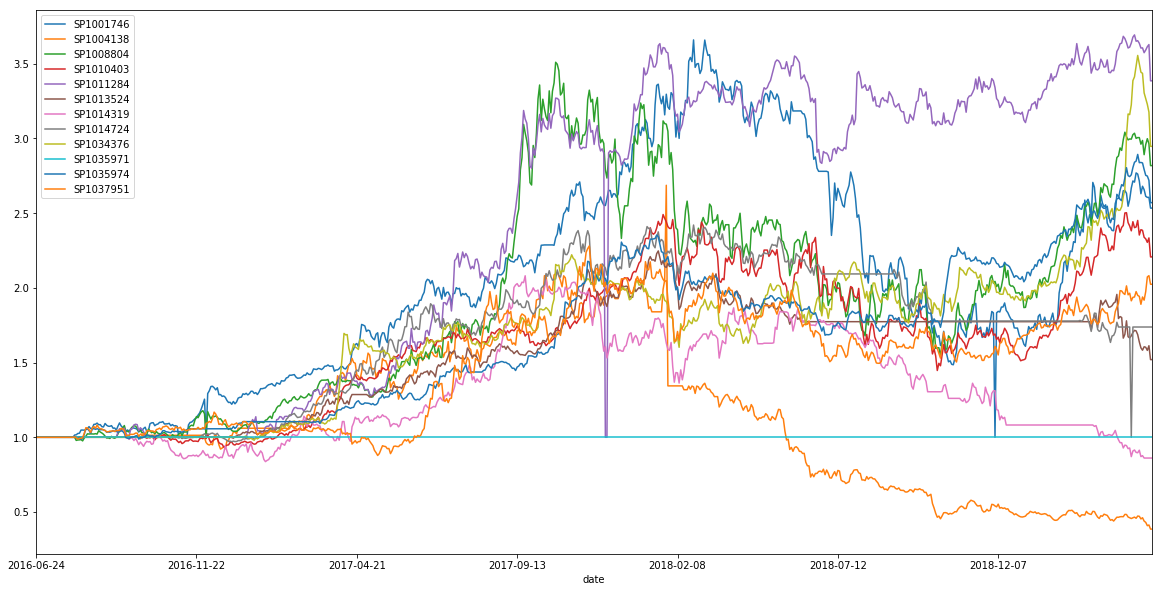

In [8]:
p=T.getperformanceall(cubelist_13)
p=p.set_index('date')
p.plot(figsize=(20,10))

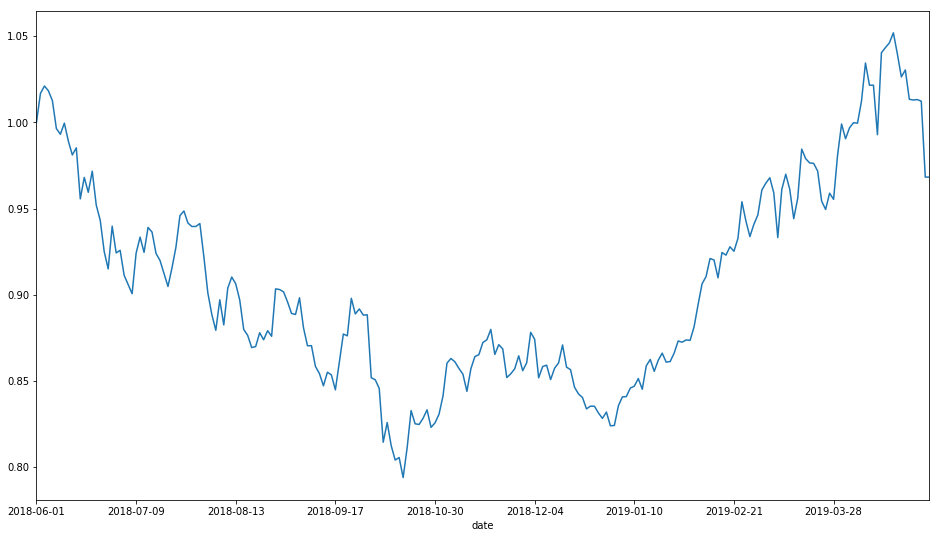

In [55]:
pp=p
# pp.plot(figsize=(16,9))
cube13=(pp['2018-06-01':]/pp['2018-06-01':].iloc[0]).mean(1)
cube13.plot(figsize=(16,9))

In [27]:
c=cubelist_13[0][0]
if c.startswith('SP'):
    url='https://xueqiu.com/service/tc/snowx/PAMID/cubes/nav_daily/all?cube_symbol=%s'%c
else:
    url='https://xueqiu.com/cubes/nav_daily/all.json?cube_symbol=%s'%c
r=json.loads(T.s.get(url).content.decode('utf8'))
if len(r)>0:
    datelist=[d['date'] for d in r[1]['list']]
    valuelist=[d['value'] for d in r[1]['list']]
    pf=pd.DataFrame()
    pf['date']=datelist
    pf['value']=valuelist
    


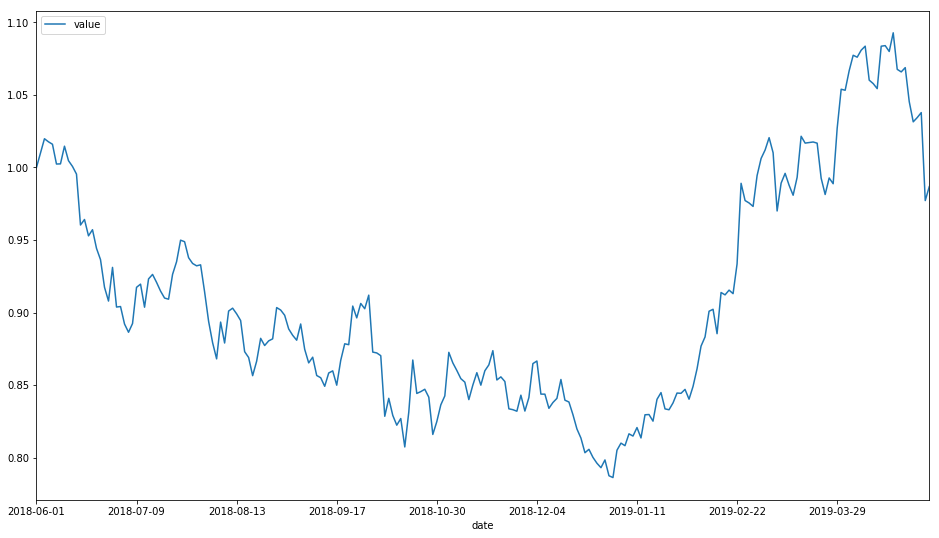

In [56]:
ppf=pf
ppf=ppf.set_index('date')
# pp.plot(figsize=(16,9))
szindex=(ppf['2018-06-01':]/ppf['2018-06-01':].iloc[0])
szindex.plot(figsize=(16,9))

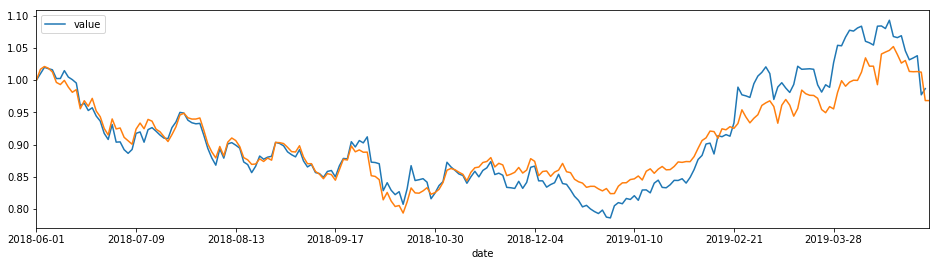

In [57]:
szindex.plot(figsize=(16,4))
cube13.plot(figsize=(16,4))

In [42]:
dd=ppf['2017-04-21':]
dd.iloc[0]

value    3466.7865
Name: 2017-04-21, dtype: float64

In [ ]:
T.g

In [11]:
#筛选
tr=tradehistory
tr['delta']=tr['target']-tr['prev']
#时间
#tr=tr[tr['date']>=str(datetime.now().strftime("%Y-%m-%d"))]
tr=tr[tr['date']>='2017-12-01']
#stock in stocklessthan10
tr=tr.loc[[s in stocklessthan10 for s in tr['stock'].tolist()]]
#合并
trgp=tr.groupby(by='stock').sum()[['delta']]
trgp[['stock_name','focusprice']]=tr.groupby(by='stock').last()[['stock_name','focusprice']]
trgp['amount']=round(10000.0*trgp['delta']/100.0/trgp['focusprice']/100)*100
#排序，先卖后买，按照delta比重从大到小买
trgp=pd.concat([trgp[trgp['delta']<0].sort_values(by='delta'),trgp[trgp['delta']>0].sort_values(by='delta',ascending=False)])
trgp['delta']=trgp['delta']/3.0
trgp

,delta,stock_name,focusprice,amount
stock,,,,
SH601899,-21.750000,紫金矿业,3.950,-1700.0
SZ000671,-16.250000,阳 光 城,7.210,-700.0
SZ000876,-12.043333,新 希 望,7.530,-500.0
SZ002388,-10.240000,新亚制程,8.290,-400.0
SH601985,-9.603333,中国核电,7.460,-400.0
SZ002807,-3.703333,江阴银行,8.061,-100.0
SZ000559,-3.316667,万向钱潮,9.400,-100.0
SH600917,-1.930000,重庆燃气,11.170,-100.0
SZ000961,-1.120000,中南建设,5.980,-100.0


In [4]:
#
# from base import *
# from spyer import *
# from cubetrader import *

xq_a_token="409f6a299262d9bac79a7f4c56768db8744e85c0"

T=xueqiu_spyer(xq_a_token)
tradehistory=T.getcubetradehistoryall(cubelist_100,1)
#筛选
tr=tradehistory
tr['delta']=tr['target']-tr['prev']
#时间
#tr=tr[tr['date']>=str(datetime.now().strftime("%Y-%m-%d"))]
tr=tr[tr['date']>='2017-12-01']
#stock in stocklessthan10
tr=tr.loc[[s in stocklessthan10 for s in tr['stock'].tolist()]]
#合并
trgp=tr.groupby(by='stock').sum()[['delta']]
trgp[['stock_name','focusprice']]=tr.groupby(by='stock').last()[['stock_name','focusprice']]
trgp['amount']=round(10000.0*trgp['delta']/100.0/trgp['focusprice']/100)*100
#排序，先卖后买，按照delta比重从大到小买
trgp=pd.concat([trgp[trgp['delta']<0].sort_values(by='delta'),trgp[trgp['delta']>0].sort_values(by='delta',ascending=False)])
trgp['delta']=trgp['delta']/3.0

#尝试交易
tradeinfo=''
CT=CubeTrader(xq_a_token,'ZH1214799')
if CT==False:
    mail('TradeRecent_cookies_error','TradeRecent_cookies_error')
else:
    for n in range(len(trgp)):
        if trgp.iloc[n]['delta']>10:#过滤小额波动
            print(trgp.iloc[n].name,trgp.iloc[n]['delta'])
            tradeinfo=tradeinfo+CT.addtrans(trgp.iloc[n].name,trgp.iloc[n]['delta'])[2]+"</br>"

#邮件通知
msg="TradeAction</br>"+trgp[['stock_name','delta','focusprice','amount']].to_html()
msg=msg+"</br>Original TradeHistory</br>"+tr.to_html()
mail('TradeRecent_cubelist100_lessthan10',msg+"</br>personcash=10000</br>cubelist_100="+str(cubelist_100)+"</br>Tradeinfo ZH1214799</br>"+tradeinfo)


2017-12-22 09:39:44.316924 retry getcubetradehistory SP1007411
2017-12-22 09:40:49.593498 retry getcubetradehistory SP1040730
2017-12-22 09:41:55.024136 retry getcubetradehistory SP1011284
2017-12-22 09:42:36.764691 retry getcubetradehistory SP1032842
2017-12-22 09:43:42.341091 retry getcubetradehistory SP1031111
2017-12-22 09:44:55.182956 retry getcubetradehistory SP1030533
2017-12-22 09:46:00.614613 retry getcubetradehistory SP1008804
2017-12-22 09:47:05.950557 retry getcubetradehistory SP1007406
2017-12-22 09:47:34.457342 retry getcubetradehistory SP1031303
2017-12-22 09:48:39.760977 retry getcubetradehistory SP1000223
2017-12-22 09:49:36.952061 retry getcubetradehistory SP1036120
2017-12-22 09:49:59.785080 retry getcubetradehistory SP1037693
2017-12-22 09:50:15.953370 retry getcubetradehistory SP1014166
2017-12-22 09:50:21.214299 retry getcubetradehistory SP1032106
2017-12-22 09:50:29.260627 retry getcubetradehistory SP1038275
2017-12-22 09:51:31.247825 retry getcubetradehistory SP

In [ ]:
trgp

In [26]:
time.sleep(1)

In [23]:
T=xueqiu_spyer()
pf=T.getperformanceall(cubelist_13)

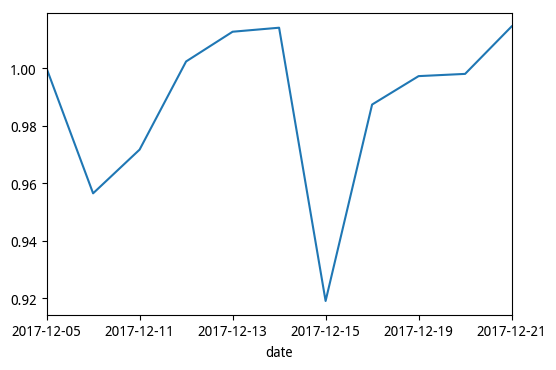

In [24]:
pfre=pf.set_index('date')
pfre=pfre['2017-12-05':]

pfre.fillna(1)
pfre=pfre/pfre.iloc[0]
pfre.mean(axis=1).plot()
# pfre

In [126]:
tradehistory.head()

,cube,date,stock,stock_name,prev,target,focusprice,delta
0,SP1010255,2016-07-12 15:00:00,SZ300512,中亚股份,14.36,28.71,90.400,14.35
1,SP1003728,2016-07-18 10:40:19,SH600198,大唐电信,0.00,83.33,21.550,83.33
3,SP1010255,2016-07-18 13:49:23,SH600570,恒生电子,4.18,0.00,61.580,-4.18
4,SP1002647,2016-07-22 10:23:40,SH600315,上海家化,28.84,99.50,28.750,70.66
5,SP1000223,2016-08-05 14:57:59,SH601020,华钰矿业,35.57,4.45,31.733,-31.12


In [143]:
timedelta

'2017-12-16 00:49:42.387634'

In [140]:
T=xueqiu_spyer()
tradehistory=T.getcubetradehistoryall(cubelist_100,1)
#筛选
tr=tradehistory
tr['delta']=tr['target']-tr['prev']
#时间
tr=tr[tr['date']>=str(datetime.now().strftime("%Y-%m-%d"))]
#stock in stocklessthan10
tr=tr[[s in stocklessthan10 for s in tr['stock'].tolist()]]
#合并
trgp=tr.groupby(by='stock').sum()[['delta']]
trgp[['stock_name','focusprice']]=tr.groupby(by='stock').last()[['stock_name','focusprice']]
trgp['amount']=round(10000.0*trgp['delta']/100.0/trgp['focusprice']/100)*100
trgp=pd.concat([trgp[trgp['delta']<0].sort_values(by='delta'),trgp[trgp['delta']>0].sort_values(by='delta',ascending=False)])

#尝试交易
tradeinfo=''
CT=CubeTrader('ZH1214799')
if CT==False:
    mail('TradeRecent_cookies_error','TradeRecent_cookies_error')
else:
    for n in range(len(trgp)):
        if trgp.iloc[n]['delta']>10:#过滤小额波动
            print(trgp.iloc[n].name,trgp.iloc[n]['delta'])
            tradeinfo=tradeinfo+CT.addtrans(trgp.iloc[n].name,trgp.iloc[n]['delta'])[2]['comment']

#邮件通知
msg="TradeAction</br>"+trgp[['stock_name','delta','focusprice','amount']].to_html()
msg=msg+"</br>Original TradeHistory</br>"+tr.to_html()
mail('TradeRecent_cubelist100_lessthan10',msg+"</br>personcash=10000</br>cubelist_100="+str(cubelist_100)+"</br>Tradeinfo ZH1214799</br>"+tradeinfo)


SZ000876 32.66
SZ000069 10.41


NameError: name 'mail' is not defined

In [138]:
CT.addtrans(trgp.iloc[n].name,1)[2]['comment']

'@Rowin8520 调整了 6 只股票：\n买入新希望：0.00% → 32.65%\n买入华侨城A：0.00% → 10.41%\n买入第一创业：0.00% → 3.00%\n...'

In [141]:
msg+"</br>personcash=10000</br>cubelist_100="+str(cubelist_100)+"</br>Tradeinfo ZH1214799</br>"+tradeinfo

'TradeAction</br><table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>stock_name</th>\n      <th>delta</th>\n      <th>focusprice</th>\n      <th>amount</th>\n    </tr>\n    <tr>\n      <th>stock</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>SZ002436</th>\n      <td>兴森科技</td>\n      <td>-10.26</td>\n      <td>6.57</td>\n      <td>-200.0</td>\n    </tr>\n    <tr>\n      <th>SZ002797</th>\n      <td>第一创业</td>\n      <td>-10.00</td>\n      <td>9.50</td>\n      <td>-100.0</td>\n    </tr>\n    <tr>\n      <th>SH601988</th>\n      <td>中国银行</td>\n      <td>-0.09</td>\n      <td>3.89</td>\n      <td>-0.0</td>\n    </tr>\n    <tr>\n      <th>SZ000876</th>\n      <td>新 希 望</td>\n      <td>32.66</td>\n      <td>7.49</td>\n      <td>400.0</td>\n    </tr>\n    <tr>\n      <th>SZ000069</th>\n      <td>华侨城Ａ</td>\n      <td>10.41</td>\n      <td>8.40</td>\n     